## 어느 역에서 가장 많이 지하철을 탈까?

In [1]:
import pandas as pd

In [4]:
file = './data/subway_raw.xlsx'

raw = pd.read_excel(file)
raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
0,20190101,경춘선,1323,가평,1520,1436,20190104,화
1,20190101,경춘선,1322,상천,275,114,20190104,화
2,20190101,경춘선,1321,청평,1509,1083,20190104,화
3,20190101,경춘선,1320,대성리,357,271,20190104,화
4,20190101,경춘선,1319,마석,1772,1963,20190104,화


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   노선명     99342 non-null  object
 2   역ID     99342 non-null  int64 
 3   역명      99342 non-null  object
 4   승차총승객수  99342 non-null  int64 
 5   하차총승객수  99342 non-null  int64 
 6   등록일자    99342 non-null  int64 
 7   요일      99342 non-null  object
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


### 가장 승객이 많이 타는 역은?

In [6]:
data_station = raw.pivot_table(index='역명',values='승차총승객수',aggfunc='sum')
data_station = data_station.sort_values(by='승차총승객수',ascending=False)
data_station.head(10)

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147
사당,12304165
신림,11881525
선릉,10725980
구로디지털단지,10577842


### 노선별로 역별/요일별 승객수를 비교하자

In [8]:
raw['노선명'].unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [12]:
line = '1호선'
data_line = raw[raw['노선명'] == line]

#역을 순서대로 보기 위해 역ID를 사용합니다.
data_pivot = data_line.pivot_table(index=['역ID','역명'], columns = '요일', values='승차총승객수',aggfunc='sum')
data_pivot

,요일,금,목,수,월,일,토,화
역ID,역명,,,,,,,
150,서울역,1713426,1464058,1294993,1393534,982663,1305254,1450435
151,시청,762319,703511,628091,640200,298211,509676,713864
152,종각,1322916,1209061,1081454,1121870,529500,864711,1197708
153,종로3가,977886,899436,800413,838255,538763,880772,873786
154,종로5가,783878,728118,639769,684973,331649,687458,721713
155,동대문,400480,365131,329555,356532,323882,392698,373526
156,신설동,467609,430631,386989,415996,241796,323935,431354
157,제기동,562030,535471,475634,523596,329532,496330,537898
158,청량리(서울시립대입구),709061,659927,589248,635328,469806,632366,663575


요일이 뒤죽박죽이기 때문에 새로 재정의합니다.

In [13]:
data_pivot = data_pivot[['월','화','수','목','금','토','일']]
data_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,1393534,1450435,1294993,1464058,1713426,1305254,982663
151,시청,640200,713864,628091,703511,762319,509676,298211
152,종각,1121870,1197708,1081454,1209061,1322916,864711,529500
153,종로3가,838255,873786,800413,899436,977886,880772,538763
154,종로5가,684973,721713,639769,728118,783878,687458,331649
155,동대문,356532,373526,329555,365131,400480,392698,323882
156,신설동,415996,431354,386989,430631,467609,323935,241796
157,제기동,523596,537898,475634,535471,562030,496330,329532
158,청량리(서울시립대입구),635328,663575,589248,659927,709061,632366,469806


단위가 너무 크기 때문에 10000으로 나눠줍니다.

In [14]:
data_pivot = data_pivot/10000
data_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
151,시청,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
152,종각,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
153,종로3가,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
154,종로5가,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
155,동대문,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
156,신설동,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
157,제기동,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
158,청량리(서울시립대입구),63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


### 시각화

In [15]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

if platform.system()=='Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False

### 히트맵으로 그리기

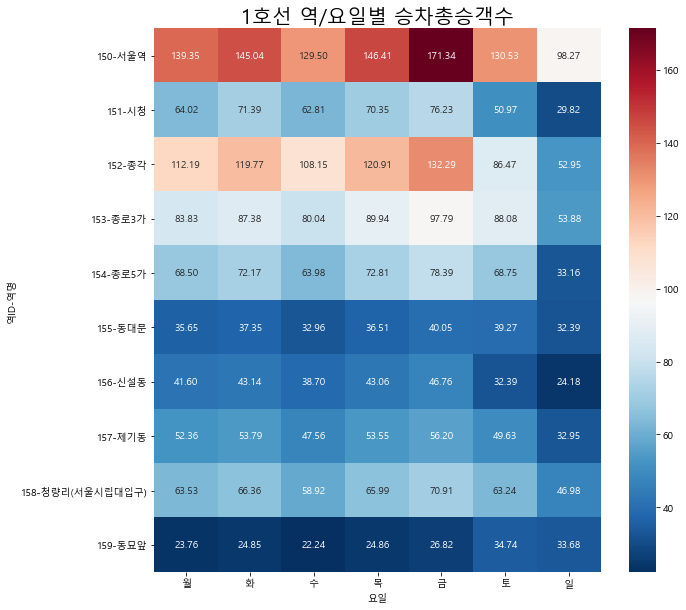

In [28]:
#높을수록 빨강, 낮을수록 파랑
fig, ax = plt.subplots(figsize=(10,10))
plt.title('1호선 역/요일별 승차총승객수',fontsize=20)
sns.heatmap(data_pivot, cmap='RdBu_r',annot=True, fmt='.2f')

이번에는 1호선~9호선 노선 리스트를 정리한다.

In [32]:
number_lines = []
for line in raw['노선명'].unique():
    if line.endswith('호선') and len(line) <=4:
        number_lines.append(line)

In [33]:
number_lines

['2호선', '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '1호선']

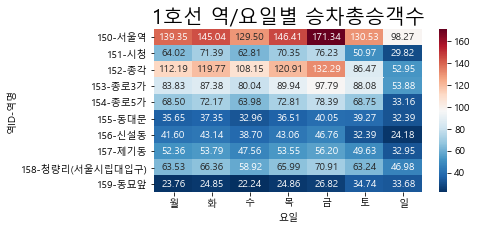

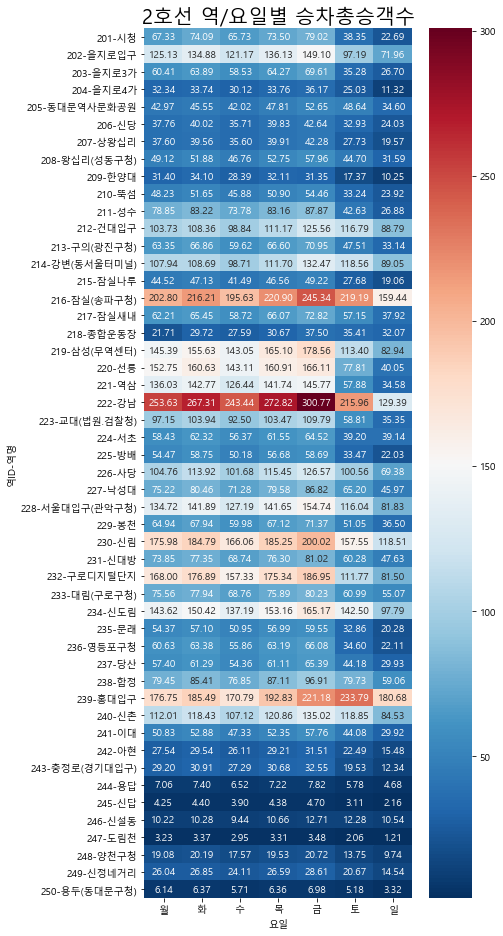

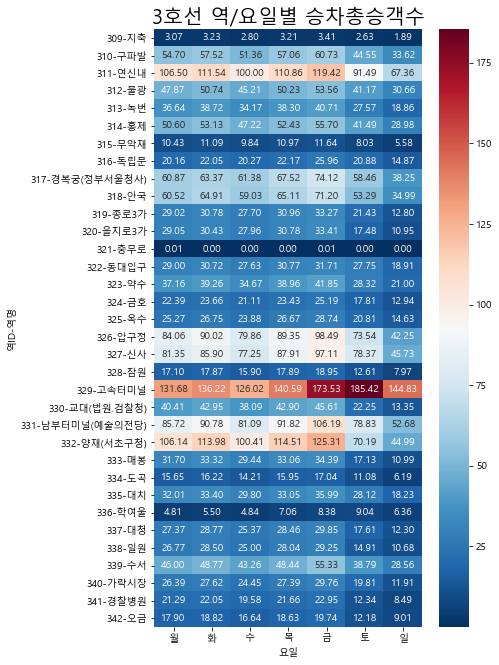

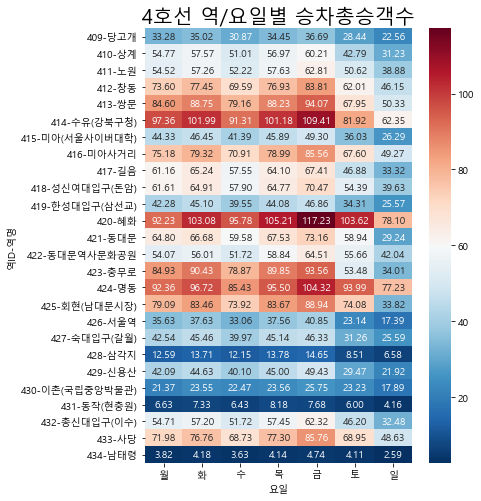

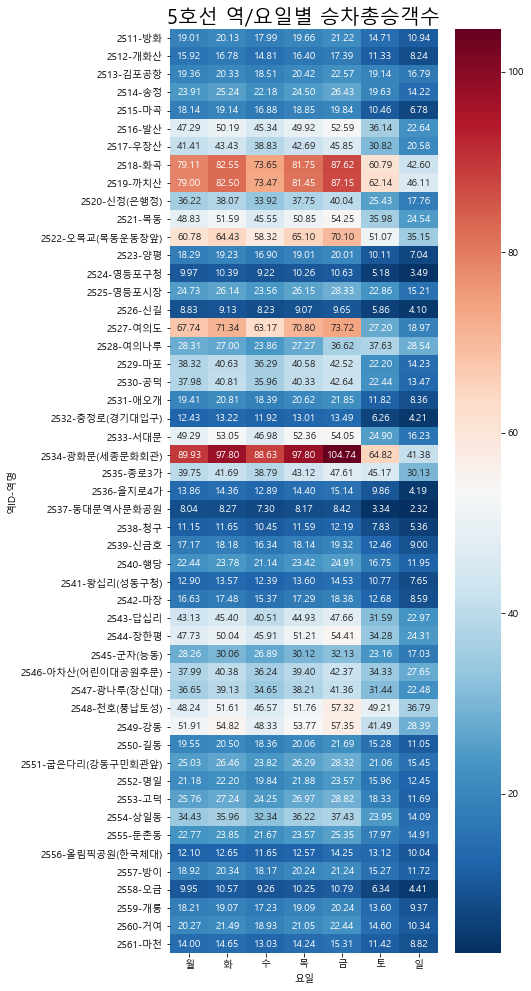

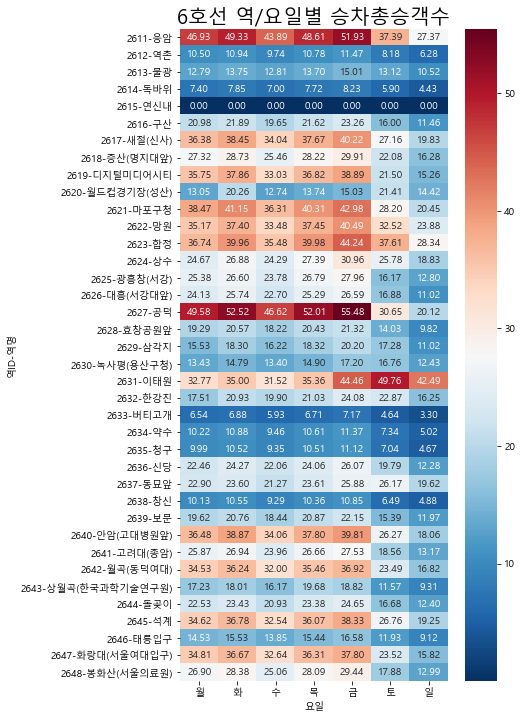

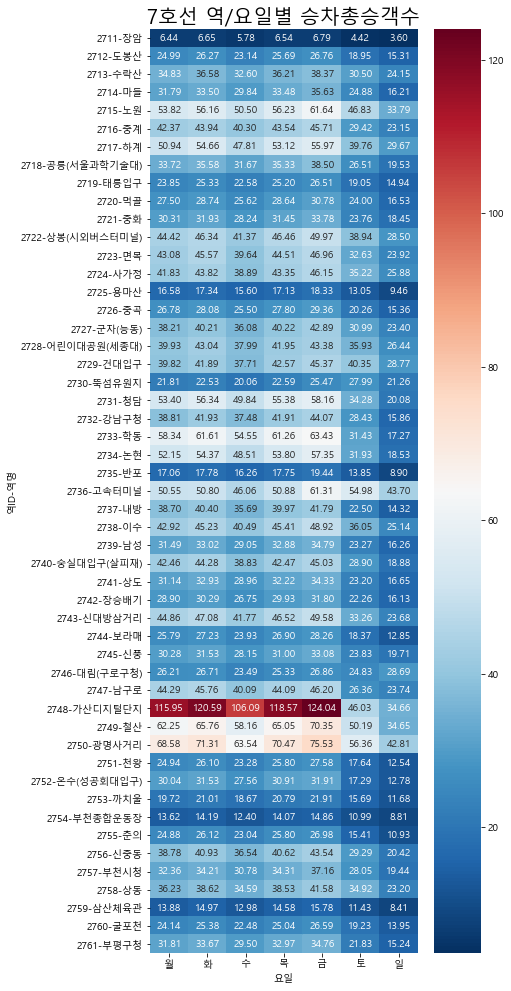

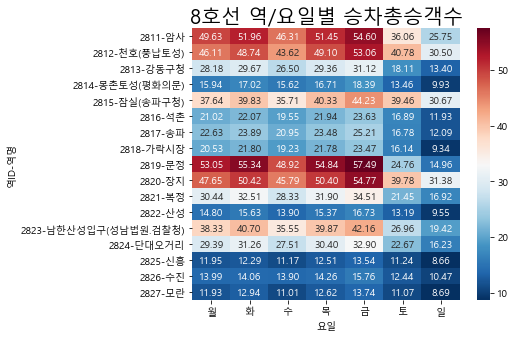

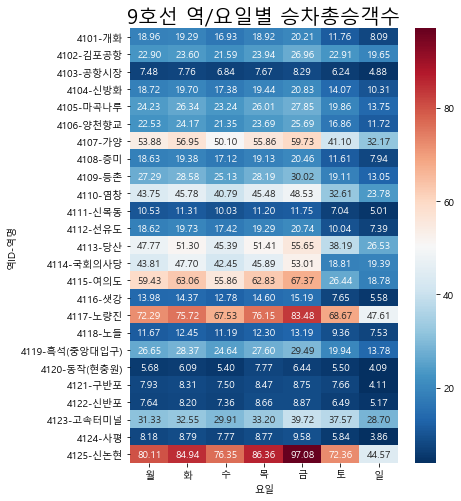

In [39]:
for line in sorted(number_lines):
    data_line = raw[raw['노선명'] == line]

    #역을 순서대로 보기 위해 역ID를 사용합니다.
    data_pivot = data_line.pivot_table(index=['역ID','역명'], columns = '요일', values='승차총승객수',aggfunc='sum')
    data_pivot = data_pivot[['월','화','수','목','금','토','일']]
    data_pivot = data_pivot/10000
    
    fig, ax = plt.subplots(figsize=(6,len(data_pivot)//3))
    plt.title(f'{line} 역/요일별 승차총승객수',fontsize=20)
    sns.heatmap(data_pivot, cmap='RdBu_r',annot=True, fmt='.2f')